# Understanding Pandas Series and DataFrames - Lab

## Introduction

In this lab, let's get some hands on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

## Let's get started!

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('turnstile_180901.txt')
print(len(df))
df.head()

197625


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Rename all the columns to lower case

In [5]:
#Your code here
new_cols = {col: col.lower().strip() for col in df.columns}

In [6]:
new_cols

{'C/A': 'c/a',
 'DATE': 'date',
 'DESC': 'desc',
 'DIVISION': 'division',
 'ENTRIES': 'entries',
 'EXITS                                                               ': 'exits',
 'LINENAME': 'linename',
 'SCP': 'scp',
 'STATION': 'station',
 'TIME': 'time',
 'UNIT': 'unit'}

In [7]:
df.rename(axis=1, mapper=new_cols, inplace=True)
df.columns

Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries', 'exits'],
      dtype='object')

## Change the Index to be the Line Names

In [12]:
#Your code here
df.set_index(keys='linename', inplace=True)
df.head()

,index,c/a,unit,scp,station,division,date,time,desc,entries,exits
linename,,,,,,,,,,,
NQR456W,0,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
NQR456W,1,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
NQR456W,2,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
NQR456W,3,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
NQR456W,4,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Painstakingly change the index back

In [15]:
# Your code here
df.reset_index(inplace=True)
df.head()

,linename,index,c/a,unit,scp,station,division,date,time,desc,entries,exits
0,NQR456W,0,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,NQR456W,1,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,NQR456W,2,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,NQR456W,3,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,NQR456W,4,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Create another column 'Num_Lines' that is a count of how many lines pass through a station. Then sort your dataframe by this column in descending order

In [29]:
# Your code here
station_lines = df.groupby('station')['linename'].nunique()
station_lines.head()

station
1 AV             1
103 ST           3
103 ST-CORONA    1
104 ST           2
110 ST           1
Name: linename, dtype: int64

In [34]:
station_lines.loc['103 ST']

3

In [40]:
df["Num_Lines"] = [station_lines.loc[str(station)] for station in df.station]
df.head()

,linename,index,c/a,unit,scp,station,division,date,time,desc,entries,exits,Num_Lines
0,NQR456W,0,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184,3
1,NQR456W,1,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188,3
2,NQR456W,2,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229,3
3,NQR456W,3,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314,3
4,NQR456W,4,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384,3


## Write a function to clean a column name

In [ ]:
def clean(col_name):
    cleaned = #Your code here; whatever you want to do to col_name. Hint: think back to str methods.
    return cleaned

In [ ]:
#This is a list comprehension. It applies your clean function to every item in the list.
#We then reassign that to df.columns
#You shouldn't have to change anything here.
#Your function above should work appropriately here.
df.columns = [clean(col) for col in df.columns] 

In [ ]:
#Checking the output, we can see the results.
df.columns

## Compare subway traffic by day of the week. Display this as a graph.

In [41]:
#Your code here
df.head()

,linename,index,c/a,unit,scp,station,division,date,time,desc,entries,exits,Num_Lines
0,NQR456W,0,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184,3
1,NQR456W,1,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188,3
2,NQR456W,2,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229,3
3,NQR456W,3,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314,3
4,NQR456W,4,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384,3


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197625 entries, 0 to 197624
Data columns (total 13 columns):
linename     197625 non-null object
index        197625 non-null int64
c/a          197625 non-null object
unit         197625 non-null object
scp          197625 non-null object
station      197625 non-null object
division     197625 non-null object
date         197625 non-null object
time         197625 non-null object
desc         197625 non-null object
entries      197625 non-null int64
exits        197625 non-null int64
Num_Lines    197625 non-null int64
dtypes: int64(4), object(9)
memory usage: 19.6+ MB


In [43]:
df.date = pd.to_datetime(df.date)
df.head()

,linename,index,c/a,unit,scp,station,division,date,time,desc,entries,exits,Num_Lines
0,NQR456W,0,A002,R051,02-00-00,59 ST,BMT,2018-08-25,00:00:00,REGULAR,6736067,2283184,3
1,NQR456W,1,A002,R051,02-00-00,59 ST,BMT,2018-08-25,04:00:00,REGULAR,6736087,2283188,3
2,NQR456W,2,A002,R051,02-00-00,59 ST,BMT,2018-08-25,08:00:00,REGULAR,6736105,2283229,3
3,NQR456W,3,A002,R051,02-00-00,59 ST,BMT,2018-08-25,12:00:00,REGULAR,6736180,2283314,3
4,NQR456W,4,A002,R051,02-00-00,59 ST,BMT,2018-08-25,16:00:00,REGULAR,6736349,2283384,3


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197625 entries, 0 to 197624
Data columns (total 13 columns):
linename     197625 non-null object
index        197625 non-null int64
c/a          197625 non-null object
unit         197625 non-null object
scp          197625 non-null object
station      197625 non-null object
division     197625 non-null object
date         197625 non-null datetime64[ns]
time         197625 non-null object
desc         197625 non-null object
entries      197625 non-null int64
exits        197625 non-null int64
Num_Lines    197625 non-null int64
dtypes: datetime64[ns](1), int64(4), object(8)
memory usage: 19.6+ MB


In [46]:
df["day_of_week"] = df.date.dt.dayofweek
df.head()

,linename,index,c/a,unit,scp,station,division,date,time,desc,entries,exits,Num_Lines,day_of_week
0,NQR456W,0,A002,R051,02-00-00,59 ST,BMT,2018-08-25,00:00:00,REGULAR,6736067,2283184,3,5
1,NQR456W,1,A002,R051,02-00-00,59 ST,BMT,2018-08-25,04:00:00,REGULAR,6736087,2283188,3,5
2,NQR456W,2,A002,R051,02-00-00,59 ST,BMT,2018-08-25,08:00:00,REGULAR,6736105,2283229,3,5
3,NQR456W,3,A002,R051,02-00-00,59 ST,BMT,2018-08-25,12:00:00,REGULAR,6736180,2283314,3,5
4,NQR456W,4,A002,R051,02-00-00,59 ST,BMT,2018-08-25,16:00:00,REGULAR,6736349,2283384,3,5


In [47]:
days = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']
days_mapper = dict(zip(range(7), days))
days_mapper

{0: 'monday',
 1: 'tuesday',
 2: 'wednesday',
 3: 'thursday',
 4: 'friday',
 5: 'saturday',
 6: 'sunday'}

## Is there more subway traffic on a weekend or a weekday?    Be specific in comparing magnitudes

In [49]:
#Your code here
# so I just made a mapper called days_mapper
# now I'm going to use this mapper to make a new column
# this column will contain the days of the week, but instead of numbers
# we are going to use their names
# so let's do that! 

# the map function is a great start
# i know...it's awesome
# here we can use our map, it will read our keys and replace them with their values

# now lets' make a new column with it
df["weekday"] = df.day_of_week.map(days_mapper)
df.head()

,linename,index,c/a,unit,scp,station,division,date,time,desc,entries,exits,Num_Lines,day_of_week,weekday
0,NQR456W,0,A002,R051,02-00-00,59 ST,BMT,2018-08-25,00:00:00,REGULAR,6736067,2283184,3,5,saturday
1,NQR456W,1,A002,R051,02-00-00,59 ST,BMT,2018-08-25,04:00:00,REGULAR,6736087,2283188,3,5,saturday
2,NQR456W,2,A002,R051,02-00-00,59 ST,BMT,2018-08-25,08:00:00,REGULAR,6736105,2283229,3,5,saturday
3,NQR456W,3,A002,R051,02-00-00,59 ST,BMT,2018-08-25,12:00:00,REGULAR,6736180,2283314,3,5,saturday
4,NQR456W,4,A002,R051,02-00-00,59 ST,BMT,2018-08-25,16:00:00,REGULAR,6736349,2283384,3,5,saturday


In [57]:
# now let's plot a bar chart with number of rides in that given day of week
# sorry I'm picking between pandas and matplotlib...Im going to use pandas

weekday_series = df.weekday.value_counts()

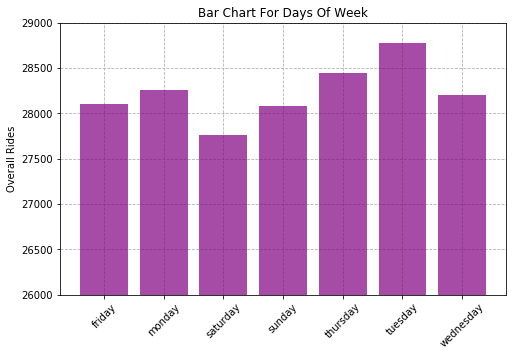

In [82]:
plt.figure(figsize=(8, 5))
plt.grid(linestyle='dashed', zorder=0)
plt.bar(weekday_series.index, weekday_series.values, color='purple', alpha=0.7, zorder=3)
plt.title("Bar Chart For Days Of Week")
plt.ylim([26000, 29000])
plt.ylabel("Overall Rides")
plt.xticks(rotation=45)
plt.show()

## Drop a couple of columns

In [88]:
# Your code here
df.drop(columns=np.random.choice(df.columns, size=8, replace=False), inplace=True)

In [89]:
df.head()

,index,c/a,unit,station,division,date,exits
0,0,A002,R051,59 ST,BMT,2018-08-25,2283184
1,1,A002,R051,59 ST,BMT,2018-08-25,2283188
2,2,A002,R051,59 ST,BMT,2018-08-25,2283229
3,3,A002,R051,59 ST,BMT,2018-08-25,2283314
4,4,A002,R051,59 ST,BMT,2018-08-25,2283384


## Summary

Great! You practiced your data cleanup-skills using Pandas.